In [284]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
torch.__version__
import re
import nltk
from sklearn.datasets import load_files
# nltk.download()
import pickle
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import OrderedDict
from nltk.tokenize import word_tokenize
import torch
import torchvision
import torchvision.transforms as transforms

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# !kaggle competitions download -c nlp-getting-started

In [3]:
# !ls -l

total 4080
-rw-r--r--  1 sakib  staff   13314 Dec 28 00:24 NLP.ipynb
-rw-r--r--  1 sakib  staff  607343 Dec 25 00:58 nlp-getting-started.zip
-rw-r--r--  1 sakib  staff   22746 Dec 16  2019 sample_submission.csv
-rw-r--r--  1 sakib  staff   22746 Dec 25 14:36 submission.csv
-rw-r--r--  1 sakib  staff  420783 Dec 16  2019 test.csv
-rw-r--r--  1 sakib  staff  987712 Dec 16  2019 train.csv


In [4]:
# !unzip nlp-getting-started.zip

In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [6]:
train_df[train_df["target"] == 0]["text"].values[1]
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [267]:
#removing any shortforms if present
def remove_shortforms(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def remove_special_char(text):
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text

def remove_wordswithnum(text):
    text = re.sub("\S*\d\S*", "", text).strip()
    return text

def lowercase(text):
    text = text.lower()
    return text

def remove_stop_words(text):
    text = remove_stopwords(text)
    return text

st = SnowballStemmer(language='english')
def stemming(text):
    r= []
    for word in text :
        a = st.stem(word)
        r.append(a)
    return r

def listToString(s):  
    str1 = " "   
    return (str1.join(s))

def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    text = lemmatizer.lemmatize(text)
    return text

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [276]:
for i in range(len(train_df['text'])):
    train_df['text'][i] = str(train_df['text'][i])

/var/folders/qt/8vcdncgx3p9dktxgx3qzwqvc0000gn/T/ipykernel_17129/2303121758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = str(train_df['text'][i])


In [285]:
for i in range(len(train_df['text'])):
    train_df['text'][i] = remove_shortforms(train_df['text'][i])
    train_df['text'][i] = remove_special_char(train_df['text'][i])
    train_df['text'][i] = remove_wordswithnum(train_df['text'][i])
    train_df['text'][i] = lowercase(train_df['text'][i])
    train_df['text'][i] = remove_stop_words(train_df['text'][i])
    text = train_df['text'][i]
    text = text.split()
    train_df['text'][i] = stemming(text)
    s = train_df['text'][i]
    train_df['text'][i] = listToString(s)
    train_df['text'][i] = lemmatize_words(train_df['text'][i])


/var/folders/qt/8vcdncgx3p9dktxgx3qzwqvc0000gn/T/ipykernel_17129/3296559487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = remove_shortforms(train_df['text'][i])
/var/folders/qt/8vcdncgx3p9dktxgx3qzwqvc0000gn/T/ipykernel_17129/3296559487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'][i] = remove_special_char(train_df['text'][i])
/var/folders/qt/8vcdncgx3p9dktxgx3qzwqvc0000gn/T/ipykernel_17129/3296559487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [415]:
x_train, x_test, y_train, y_test = train_test_split(
    train_df['text'], train_df['target'], test_size=.2, random_state=42)

In [416]:
# def tr2(x_train,x_test):
#     tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
#     X = tfidfconverter.fit_transform(x_train)
#     X2=tfidfconverter.transform(x_test)
#     return X,X2

In [417]:
def tfidf_transform(x_train, x_test):
    kwargs = {
            'ngram_range': (1,3),  # Use 1-grams + 2-grams.
            'analyzer': 'word',  # Split text into word tokens.
            'min_df': 1,
            'stop_words': "english",
    }
    vectorizer = TfidfVectorizer(**kwargs)
    # Learn vocabulary from training texts and vectorize training texts.
    x_train_transformed = vectorizer.fit_transform(x_train)
    # Vectorize validation texts.
    x_test_transformed = vectorizer.transform(x_test)
    return x_train_transformed, x_test_transformed

tfidf_train, tfidf_test = tfidf_transform(x_train, x_test)
print(tfidf_train.shape)

(6090, 81438)


In [418]:
tfidf_train,tfidf_test=tr2(x_train,x_test)


In [419]:

x_train = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_train)).float()
x_test = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_test)).float()

In [420]:
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [421]:
model = nn.Sequential(nn.LSTM,
    nn.Linear(x_train.shape[1], 64),
                      nn.ReLU(),
                      nn.Dropout(0.1),
                      nn.Linear(64, 2),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

# Forward pass, get our logits
logps = model(x_train)
# Calculate the loss with the logits and the labels
loss = criterion(logps, y_train)

loss.backward()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [422]:
%%time
train_losses = []
test_losses = []
test_accuracies = []

epochs = 80
for e in range(epochs):
    optimizer.zero_grad()

    output = model.forward(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_ps = model(x_test)
        test_loss = criterion(log_ps, y_test)
        test_losses.append(test_loss)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == y_test.view(*top_class.shape)
        test_accuracy = torch.mean(equals.float())
        test_accuracies.append(test_accuracy)

    model.train()

    print(f"Epoch: {e+1}/{epochs}.. ",
          f"Training Loss: {train_loss:.3f}.. ",
          f"Test Loss: {test_loss:.3f}.. ",
          f"Test Accuracy: {test_accuracy:.3f}")

Epoch: 1/80..  Training Loss: 0.685..  Test Loss: 0.683..  Test Accuracy: 0.574
Epoch: 2/80..  Training Loss: 0.684..  Test Loss: 0.682..  Test Accuracy: 0.574
Epoch: 3/80..  Training Loss: 0.682..  Test Loss: 0.680..  Test Accuracy: 0.574
Epoch: 4/80..  Training Loss: 0.680..  Test Loss: 0.679..  Test Accuracy: 0.574
Epoch: 5/80..  Training Loss: 0.679..  Test Loss: 0.678..  Test Accuracy: 0.574
Epoch: 6/80..  Training Loss: 0.677..  Test Loss: 0.676..  Test Accuracy: 0.574
Epoch: 7/80..  Training Loss: 0.675..  Test Loss: 0.674..  Test Accuracy: 0.574
Epoch: 8/80..  Training Loss: 0.673..  Test Loss: 0.672..  Test Accuracy: 0.574
Epoch: 9/80..  Training Loss: 0.671..  Test Loss: 0.670..  Test Accuracy: 0.574
Epoch: 10/80..  Training Loss: 0.668..  Test Loss: 0.668..  Test Accuracy: 0.574
Epoch: 11/80..  Training Loss: 0.666..  Test Loss: 0.666..  Test Accuracy: 0.574
Epoch: 12/80..  Training Loss: 0.663..  Test Loss: 0.664..  Test Accuracy: 0.574
Epoch: 13/80..  Training Loss: 0.660.

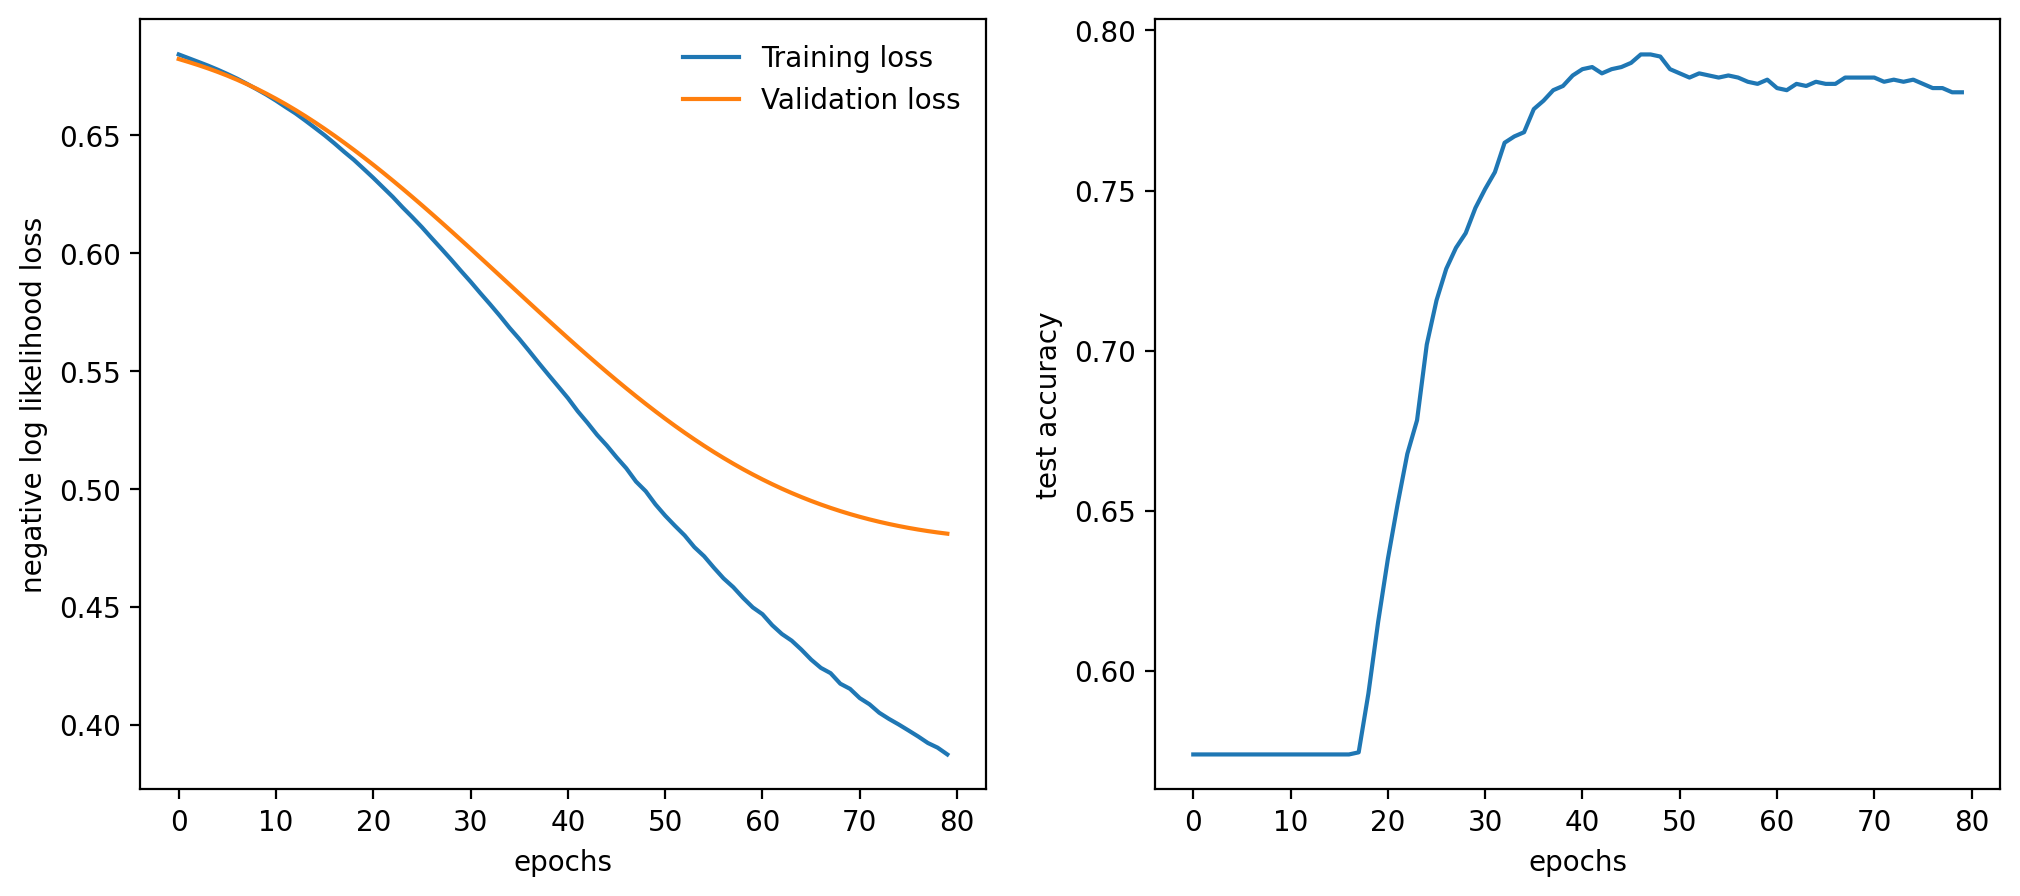

In [414]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('negative log likelihood loss')
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);
plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('test accuracy')
plt.plot(test_accuracies);

In [423]:
sample_submission = pd.read_csv("sample_submission.csv")

In [425]:
sample_submission["target"]=sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [426]:
def predict(net):
    net.eval()
    env = janestreet.make_env()
    env_iter = env.iter_test()
    for (test_df, pred_df) in tqdm(env_iter):
        test_df = pd.DataFrame(test_df, columns=feature_columns)
        test_df.fillna(-1, inplace=True)
        X_test = torch.FloatTensor(np.array(test_df)).to(device)
        logits, probas = net(X_test)
        probas = probas.cpu().detach().numpy()
        action = ((test_df['weight'].values * probas[:, 1]) > 0).astype('int')
        pred_df.action = action
        env.predict(pred_df)

In [430]:
test_df=test_df.drop(["keyword", "location"],axis=1)


In [439]:
stemming(test_df["text"][0].split())

['just', 'happen', 'a', 'terribl', 'car', 'crash']

In [440]:
test_df["text"]=test_df["text"].apply(remove_shortforms)
test_df["text"]=test_df["text"].apply(remove_special_char)
test_df["text"]=test_df["text"].apply(remove_wordswithnum)
test_df["text"]=test_df["text"].apply(lowercase)
test_df["text"]=test_df["text"].apply(remove_stop_words)
for i in range(len(test_df['text'])):
    text=test_df['text'][i].split();
    test_df['text'][i]=stemming(text);
test_df["text"]=test_df["text"].apply(listToString)
test_df["text"]=test_df["text"].apply(lemmatize_words)

/var/folders/qt/8vcdncgx3p9dktxgx3qzwqvc0000gn/T/ipykernel_17129/3238612160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'][i]=stemming(text);


In [441]:
def vectorizerForTest(df):
    kwargs = {
            'ngram_range': (1,3),  # Use 1-grams + 2-grams.
            'analyzer': 'word',  # Split text into word tokens.
            'min_df': 1,
            'stop_words': "english",
    }
    vectorizer = TfidfVectorizer(**kwargs)
    # Learn vocabulary from training texts and vectorize training texts.
    x = vectorizer.transform(df)
    return x;
    # Vectorize validation texts.

In [442]:
xYest=vectorizerForTest(test_df['text'])

NotFittedError: The TF-IDF vectorizer is not fitted